In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path_to_folder_name = 'E:\handmade\PyCharm\data_visual\\names'

In [3]:
def find_count_by_name(name, start_year, end_year):
    result_dict = {}
    for d, dirs, files in os.walk(path_to_folder_name):
        for file in files:
            year_of_this_file = int(file.strip('yob').strip('.txt'))
            if (year_of_this_file >= start_year) and (year_of_this_file <= end_year):
                with open(os.path.join(d, file), 'r') as current_year_file:
                    for i in current_year_file:
                        name_in_current_file = i.split(',')
                        if name_in_current_file[0] == name:
                            if result_dict.get(year_of_this_file) is None:
                                result_dict[year_of_this_file] = [int(name_in_current_file[2].strip('\n'))]
                            else:
                                old_value = result_dict.get(year_of_this_file)[0]
                                result_dict[year_of_this_file] = [int(name_in_current_file[2].strip('\n'))+old_value]
    return result_dict

In [4]:
def get_5y_intervals(dict_source):
    dict_results = {}
    iterator = 0
    for i in dict_source:
        if iterator == 0:
            dict_results[i] = dict_source.get(i)[0]
            iterator += 1
        elif iterator == 4:
            iterator = 0
        else:
            iterator += 1
    return dict_results

In [8]:
def find_count_r_in_1950():
    result_dict = {}
    full_file_path = os.path.join(path_to_folder_name, 'yob'+'1950'+'.txt')
    with open(full_file_path, 'r') as right_year_file:
        for name in right_year_file:
            if name.startswith('R'):
                name_in_current_file = name.split(',')
                if result_dict.get(name_in_current_file[0]) is None:
                    result_dict[name_in_current_file[0]] = [int(name_in_current_file[2].strip('\n'))]
                else:
                    old_value = result_dict.get(name_in_current_file[0])[0]
                    result_dict[name_in_current_file[0]] = [int(name_in_current_file[2].strip('\n')) + old_value]
    return result_dict

In [41]:
def get_sum_stat(start_year, end_year):
    result_dict = {}
    for d, dirs, files in os.walk(path_to_folder_name):
        for file in files:
            # print(file)
            year_of_this_file = int(file.strip('yob').strip('.txt'))
            if (year_of_this_file >= start_year) and (year_of_this_file <= end_year):
                with open(os.path.join(d, file), 'r') as current_year_file:
                    for i in current_year_file:
                        name_in_current_file = i.split(',')
                        if result_dict.get(name_in_current_file[0]) is None:
                            result_dict[name_in_current_file[0]] = int(name_in_current_file[2].strip('\n'))
                        else:
                            old_value = result_dict.get(name_in_current_file[0])
                            result_dict[name_in_current_file[0]] = int(name_in_current_file[2].strip('\n')) + old_value

    return result_dict

In [42]:
def get_consonant_count(source_dict):
    vowel = ['A', 'E', 'I', 'O', 'U', 'Y']
    result = {}
    for keys in source_dict.keys():
        counter = 0
        for key in keys:
            if key.upper() not in vowel:
                counter += 1
        old_value = source_dict.get(keys)
        result[keys] = [old_value, counter]
    return result

In [11]:
def show_plot():
    plt.plot(list(count_Ruth.keys()), list(count_Ruth.values()))
    plt.plot(list(count_Robert.keys()), list(count_Robert.values()))
    plt.legend(['Ruth', 'Robert'])
    plt.title('Plot')
    plt.show()

In [12]:
def show_gistogram():
    robert_years = list(count_Robert_5y_step.keys())
    ruth_years = list(count_Ruth_5y_step.keys())
    robert_data = list(count_Robert_5y_step.values())
    ruth_data = list(count_Ruth_5y_step.values())
    plt.bar(robert_years, robert_data)
    plt.bar(ruth_years, ruth_data)
    plt.title('Gistogram')
    plt.legend(['Robert', 'Ruth'])
    plt.show()

In [34]:
def show_pie():
    count_start_r = find_count_r_in_1950()
    df = pd.DataFrame.from_dict(count_start_r, orient='index', columns=['Count'])
    dk1 = df.sort_values(by=['Count'], ascending=False).head(10)
    dk1.plot.pie(subplots=True, figsize=(20, 10))
    plt.title('Top10 names start with "R"')
    plt.show()

In [78]:
def show_scatter():
    df = pd.DataFrame.from_dict(consonant_count, orient='index', columns=['count in files', 'consonant count'])
    df.plot.scatter(y='count in files', x='consonant count', s=1)
    plt.title('Зависимость числа упоминаний от количества согласных букв в имени')
    plt.show()

In [80]:
count_Ruth = find_count_by_name('Ruth', 1900, 2000)
count_Robert = find_count_by_name('Robert', 1900, 2000)
count_Ruth_5y_step = get_5y_intervals(count_Ruth)
count_Robert_5y_step = get_5y_intervals(count_Robert)
sum_stat = get_sum_stat(1900, 2000)
consonant_count = get_consonant_count(sum_stat)

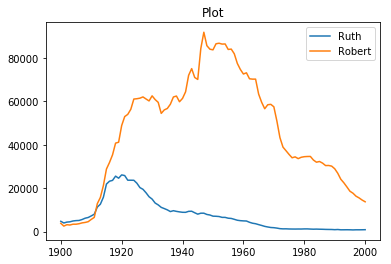

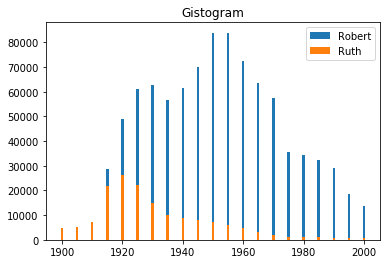

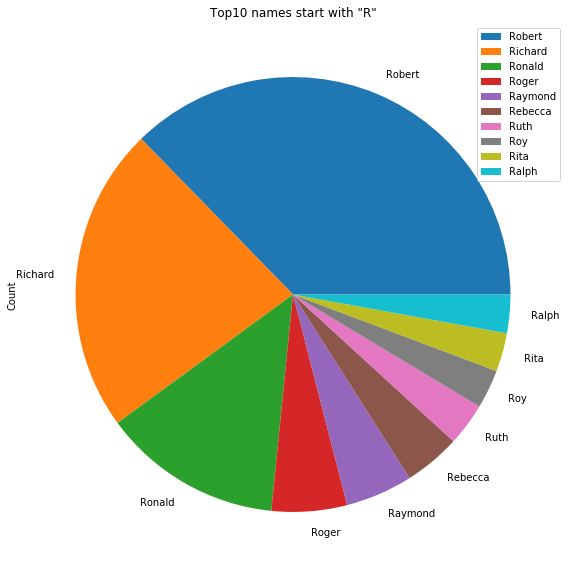

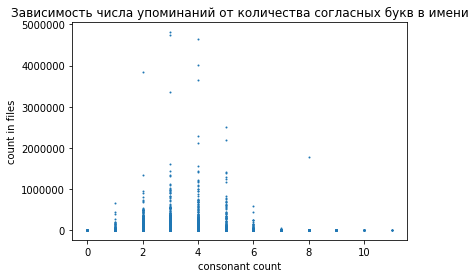

In [81]:
show_plot()
show_gistogram()
show_pie()
show_scatter()